<a href="https://colab.research.google.com/github/Pumafi/dl_spatial_gen_geol_facies/blob/main/test_varying_schedule.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
from scipy.linalg import expm

# Define the transition rate matrix Q
#Q = np.array([[-2, 1, 1],
#              [1, -3, 2],
#              [1, 2, -3]])



P(t) at t = 1 : [0.36652471 0.31673764 0.31673764]


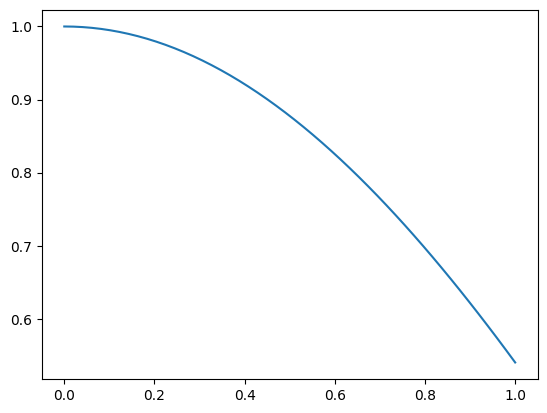

In [34]:
import matplotlib.pyplot as plt
x = np.linspace(0, 1, 50)
#plt.plot(x, np.tan(x))
plt.plot(x, np.cos(x))

In [36]:
1 - np.cos(x)

array([0.00000000e+00, 2.08239336e-04, 8.32870618e-04, 1.87363370e-03,
       3.33009512e-03, 5.20164831e-03, 7.48751379e-03, 1.01867396e-02,
       1.32982014e-02, 1.68206036e-02, 2.07524789e-02, 2.50921900e-02,
       2.98379294e-02, 3.49877206e-02, 4.05394189e-02, 4.64907120e-02,
       5.28391214e-02, 5.95820031e-02, 6.67165488e-02, 7.42397872e-02,
       8.21485850e-02, 9.04396483e-02, 9.91095241e-02, 1.08154602e-01,
       1.17571114e-01, 1.27355139e-01, 1.37502601e-01, 1.48009276e-01,
       1.58870787e-01, 1.70082610e-01, 1.81640075e-01, 1.93538371e-01,
       2.05772540e-01, 2.18337488e-01, 2.31227982e-01, 2.44438653e-01,
       2.57964000e-01, 2.71798388e-01, 2.85936057e-01, 3.00371118e-01,
       3.15097560e-01, 3.30109249e-01, 3.45399933e-01, 3.60963245e-01,
       3.76792701e-01, 3.92881710e-01, 4.09223571e-01, 4.25811477e-01,
       4.42638521e-01, 4.59697694e-01])

In [89]:
import numpy as np

# Define the number of states and the parameter
num_states = 4  # Change this to the number of states in your Markov process
parameter = np.pi / 3  # The parameter for the sine values

# Create an empty infinitesimal generator matrix
Q = np.zeros((num_states, num_states))

# Fill in the off-diagonal entries with the sine of the parameter
for i in range(num_states):
    for j in range(num_states):
        if i != j:
            Q[i][j] = np.sin(parameter)

# Define the diagonal entries to ensure row sums are zero
for i in range(num_states):
    Q[i][i] = -np.sum(Q[i])

# Print the resulting infinitesimal generator matrix
print("Infinitesimal Generator Matrix (Q):")
print(Q)

Infinitesimal Generator Matrix (Q):
[[-2.59807621  0.8660254   0.8660254   0.8660254 ]
 [ 0.8660254  -2.59807621  0.8660254   0.8660254 ]
 [ 0.8660254   0.8660254  -2.59807621  0.8660254 ]
 [ 0.8660254   0.8660254   0.8660254  -2.59807621]]


In [90]:
import numpy as np
Q_integral = np.zeros((num_states, num_states))

for i in range(num_states):
    for j in range(num_states):
        if i != j:
            Q_integral[i][j] = 1 - np.cos(parameter) #-np.log(np.cos(parameter))

# Define the diagonal entries to ensure row sums are zero
for i in range(num_states):
    Q_integral[i][i] = -np.sum(Q_integral[i])

# Print the resulting infinitesimal generator matrix
print("Infinitesimal Generator Matrix Integral (Q_integral):")
print(Q_integral)

Infinitesimal Generator Matrix Integral (Q_integral):
[[-1.5  0.5  0.5  0.5]
 [ 0.5 -1.5  0.5  0.5]
 [ 0.5  0.5 -1.5  0.5]
 [ 0.5  0.5  0.5 -1.5]]


In [91]:
# Initial state distribution P(0)
P0 = np.array([1, 0, 0, 0])

# Time t
t = parameter

# Calculate the matrix exponential
eQt = expm(Q_integral)

# Calculate P(t)
Pt = np.dot(eQt, P0)

print("P(t) at t =", t, ":", Pt)

P(t) at t = 1.0471975511965976 : [0.35150146 0.21616618 0.21616618 0.21616618]


In [82]:
np.sum(Pt)

1.0000000000000133